In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

churnData = pd.read_csv('customer_churn.csv')
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [43]:
# Cast TotalChargs column to numeric and encode Churn
churnData.replace({'TotalCharges': {' ':''}}, inplace=True)
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges']).astype(float)
#churnData.isnull().sum()
churnData['TotalCharges'].fillna(churnData['TotalCharges'].dropna().median(), inplace=True)
churnData.replace({'Churn':{'Yes':1, 'No':0}}, inplace=True)
#churnData.info()

In [44]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(np.array(X_train))
X_train_scaled = scaler.transform(np.array(X_train))
X_test_scaled = scaler.transform(np.array(X_test))

#y_train.value_counts()
smote = SMOTE()
X_train_scaled_sm, y_train_sm = smote.fit_resample(pd.DataFrame(X_train_scaled), y_train)
y_train_sm.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

In [45]:
#
#
#
#
#
#
#

In [34]:
# Fit a KNN Classifier model on the training data

model = KNeighborsClassifier(n_neighbors=1, weights='uniform')
model.fit(X_train_scaled_sm, y_train_sm)

y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled_sm) # predict train (for sanity checks)

#cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
#disp = ConfusionMatrixDisplay(cm)
#disp.plot()

scores=cross_val_score(model, X_train_scaled_sm, y_train_sm, scoring="recall", cv=5)
print("Cross validation scores: ", scores)
print("Score stats: %0.2f recall with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

y_pred_train = cross_val_predict(model, X_train_scaled_sm, y_train_sm, cv=5)
performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                       'Train': [accuracy_score(y_train_sm, y_pred_train),
                                                 precision_score(y_train_sm, y_pred_train),
                                                 recall_score(y_train_sm, y_pred_train)]})
display(performance_df)

Cross validation scores:  [0.82125604 0.81257557 0.88512696 0.85990338 0.8647343 ]
Score stats: 0.85 recall with a standard deviation of 0.03


,Error_metric,Train
0,Accuracy,0.799541
1,Precision,0.772717
2,Recall,0.848719


In [41]:
model = KNeighborsClassifier(weights='uniform')
grid_search = GridSearchCV(model, {'n_neighbors': range(1,37)}, cv=5, return_train_score=True, scoring='recall', n_jobs=-1)
grid_search.fit(X_train_scaled_sm,y_train_sm)
best_params = grid_search.best_params_ #To check the best set of parameters returned
best_params

{'n_neighbors': 1}

In [36]:
def knn_classifier_range(a, b):
    start = min(a,b)
    for i in range(abs(b-a)):
        
        model = KNeighborsClassifier(n_neighbors=start+i, weights='uniform')
        model.fit(X_train_scaled_sm, y_train_sm)

        y_pred = model.predict(X_test_scaled)
        y_pred_train = model.predict(X_train_scaled_sm) # predict train (for sanity checks)

        performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                       'Train': [accuracy_score(y_train_sm, y_pred_train),
                                                 precision_score(y_train_sm, y_pred_train),
                                                 recall_score(y_train_sm, y_pred_train)],
                                       'Test': [accuracy_score(y_test, y_pred),
                                                precision_score(y_test, y_pred),
                                                recall_score(y_test, y_pred)]})
        
        print(f"K = {start+i}")
        display(performance_log)

knn_classifier_range(1,37)

K = 1


,Error_metric,Train,Test
0,Accuracy,0.991421,0.726757
1,Precision,0.994889,0.486486
2,Recall,0.987917,0.579088


K = 2


,Error_metric,Train,Test
0,Accuracy,0.917835,0.740241
1,Precision,0.999134,0.509972
2,Recall,0.836394,0.479893


K = 3


,Error_metric,Train,Test
0,Accuracy,0.887264,0.702626
1,Precision,0.853831,0.456929
2,Recall,0.934509,0.654155


K = 4


,Error_metric,Train,Test
0,Accuracy,0.866965,0.743790
1,Precision,0.886092,0.514286
2,Recall,0.842194,0.579088


K = 5


,Error_metric,Train,Test
0,Accuracy,0.847994,0.717530
1,Precision,0.817181,0.476636
2,Recall,0.896568,0.683646


K = 6


,Error_metric,Train,Test
0,Accuracy,0.837361,0.751597
1,Precision,0.841153,0.525164
2,Recall,0.831803,0.643432


K = 7


,Error_metric,Train,Test
0,Accuracy,0.826728,0.731015
1,Precision,0.797012,0.494485
2,Recall,0.876752,0.721180


K = 8


,Error_metric,Train,Test
0,Accuracy,0.821774,0.754436
1,Precision,0.819534,0.527835
2,Recall,0.825278,0.686327


K = 9


,Error_metric,Train,Test
0,Accuracy,0.815249,0.739532
1,Precision,0.788033,0.505435
2,Recall,0.862494,0.747989


K = 10


,Error_metric,Train,Test
0,Accuracy,0.812228,0.745919
1,Precision,0.804000,0.514793
2,Recall,0.825761,0.699732


K = 11


,Error_metric,Train,Test
0,Accuracy,0.807395,0.726047
1,Precision,0.779315,0.488616
2,Recall,0.857661,0.747989


K = 12


,Error_metric,Train,Test
0,Accuracy,0.806912,0.737402
1,Precision,0.794118,0.502846
2,Recall,0.828661,0.710456


K = 13


,Error_metric,Train,Test
0,Accuracy,0.802562,0.723918
1,Precision,0.771819,0.486207
2,Recall,0.859111,0.756032


K = 14


,Error_metric,Train,Test
0,Accuracy,0.800266,0.731725
1,Precision,0.783352,0.495463
2,Recall,0.830111,0.731903


K = 15


,Error_metric,Train,Test
0,Accuracy,0.796762,0.721789
1,Precision,0.764769,0.483761
2,Recall,0.857177,0.758713


K = 16


,Error_metric,Train,Test
0,Accuracy,0.79507,0.735273
1,Precision,0.77587,0.500000
2,Recall,0.82987,0.745308


K = 17


,Error_metric,Train,Test
0,Accuracy,0.791808,0.718240
1,Precision,0.759733,0.479866
2,Recall,0.853552,0.766756


K = 18


,Error_metric,Train,Test
0,Accuracy,0.793016,0.727466
1,Precision,0.772778,0.490368
2,Recall,0.830111,0.750670


K = 19


,Error_metric,Train,Test
0,Accuracy,0.789149,0.723918
1,Precision,0.756815,0.486842
2,Recall,0.852102,0.793566


K = 20


,Error_metric,Train,Test
0,Accuracy,0.787337,0.734564
1,Precision,0.767311,0.499124
2,Recall,0.824795,0.764075


K = 21


,Error_metric,Train,Test
0,Accuracy,0.785887,0.722498
1,Precision,0.757286,0.484899
2,Recall,0.841469,0.774799


K = 22


,Error_metric,Train,Test
0,Accuracy,0.782383,0.733854
1,Precision,0.763116,0.498239
2,Recall,0.818995,0.758713


K = 23


,Error_metric,Train,Test
0,Accuracy,0.780570,0.716820
1,Precision,0.751844,0.478689
2,Recall,0.837603,0.782842


K = 24


,Error_metric,Train,Test
0,Accuracy,0.780933,0.728886
1,Precision,0.761295,0.492308
2,Recall,0.818511,0.772118


K = 25


,Error_metric,Train,Test
0,Accuracy,0.778758,0.719659
1,Precision,0.750706,0.482026
2,Recall,0.834703,0.790885


K = 26


,Error_metric,Train,Test
0,Accuracy,0.777187,0.728886
1,Precision,0.756944,0.492308
2,Recall,0.816578,0.772118


K = 27


,Error_metric,Train,Test
0,Accuracy,0.773925,0.720369
1,Precision,0.745932,0.482871
2,Recall,0.830836,0.793566


K = 28


,Error_metric,Train,Test
0,Accuracy,0.772837,0.732434
1,Precision,0.752460,0.496622
2,Recall,0.813195,0.788204


K = 29


,Error_metric,Train,Test
0,Accuracy,0.771145,0.723208
1,Precision,0.743384,0.485950
2,Recall,0.828178,0.788204


K = 30


,Error_metric,Train,Test
0,Accuracy,0.770662,0.733144
1,Precision,0.750447,0.497427
2,Recall,0.811020,0.777480


K = 31


,Error_metric,Train,Test
0,Accuracy,0.769091,0.722498
1,Precision,0.741802,0.485294
2,Recall,0.825520,0.796247


K = 32


,Error_metric,Train,Test
0,Accuracy,0.767279,0.735273
1,Precision,0.747649,0.500000
2,Recall,0.806912,0.790885


K = 33


,Error_metric,Train,Test
0,Accuracy,0.763775,0.726757
1,Precision,0.738267,0.490132
2,Recall,0.817303,0.798928


K = 34


,Error_metric,Train,Test
0,Accuracy,0.764016,0.728176
1,Precision,0.745450,0.491497
2,Recall,0.801837,0.774799


K = 35


,Error_metric,Train,Test
0,Accuracy,0.761237,0.719659
1,Precision,0.737270,0.481848
2,Recall,0.811745,0.782842


K = 36


,Error_metric,Train,Test
0,Accuracy,0.762446,0.723208
1,Precision,0.743826,0.485810
2,Recall,0.800628,0.780161


In [7]:
#
#
#
#
#
#
#

In [62]:
# Fit a Logistic Regression model on the training data

log_model = LogisticRegression()
log_model.fit(X_train_scaled_sm, y_train_sm)

y_pred_train_log = log_model.predict(X_train_scaled_sm)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_sm, y_pred_train_log),
                                         precision_score(y_train_sm, y_pred_train_log),
                                         recall_score(y_train_sm, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

scores=cross_val_score(log_model, X_train_scaled_sm, y_train_sm, cv=5)
print("Cross validation scores: ", scores)
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

y_pred_train = cross_val_predict(model, X_train_scaled_sm, y_train_sm, cv=5)
performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                       'Train': [accuracy_score(y_train_sm, y_pred_train),
                                                 precision_score(y_train_sm, y_pred_train),
                                                 recall_score(y_train_sm, y_pred_train)]})
display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.731392,0.743790
1,Precision,0.726735,0.510601
2,Recall,0.741663,0.774799


Cross validation scores:  [0.73490338 0.718429   0.73836858 0.73111782 0.73534743]
Score stats: 0.73 accuracy with a standard deviation of 0.01


,Error_metric,Train
0,Accuracy,0.722209
1,Precision,0.684676
2,Recall,0.823828


In [9]:
#
#
#
#
#
#
#

,Error_metric,Train,Test
0,Accuracy,0.729821,0.675656
1,Precision,0.678157,0.443396
2,Recall,0.874819,0.882038


Cross validation scores:  [0.7173913  0.73293051 0.72507553 0.73293051 0.73232628]
Score stats: 0.73 accuracy with a standard deviation of 0.01


,Error_metric,Train
0,Accuracy,0.728130
1,Precision,0.677912
2,Recall,0.869261


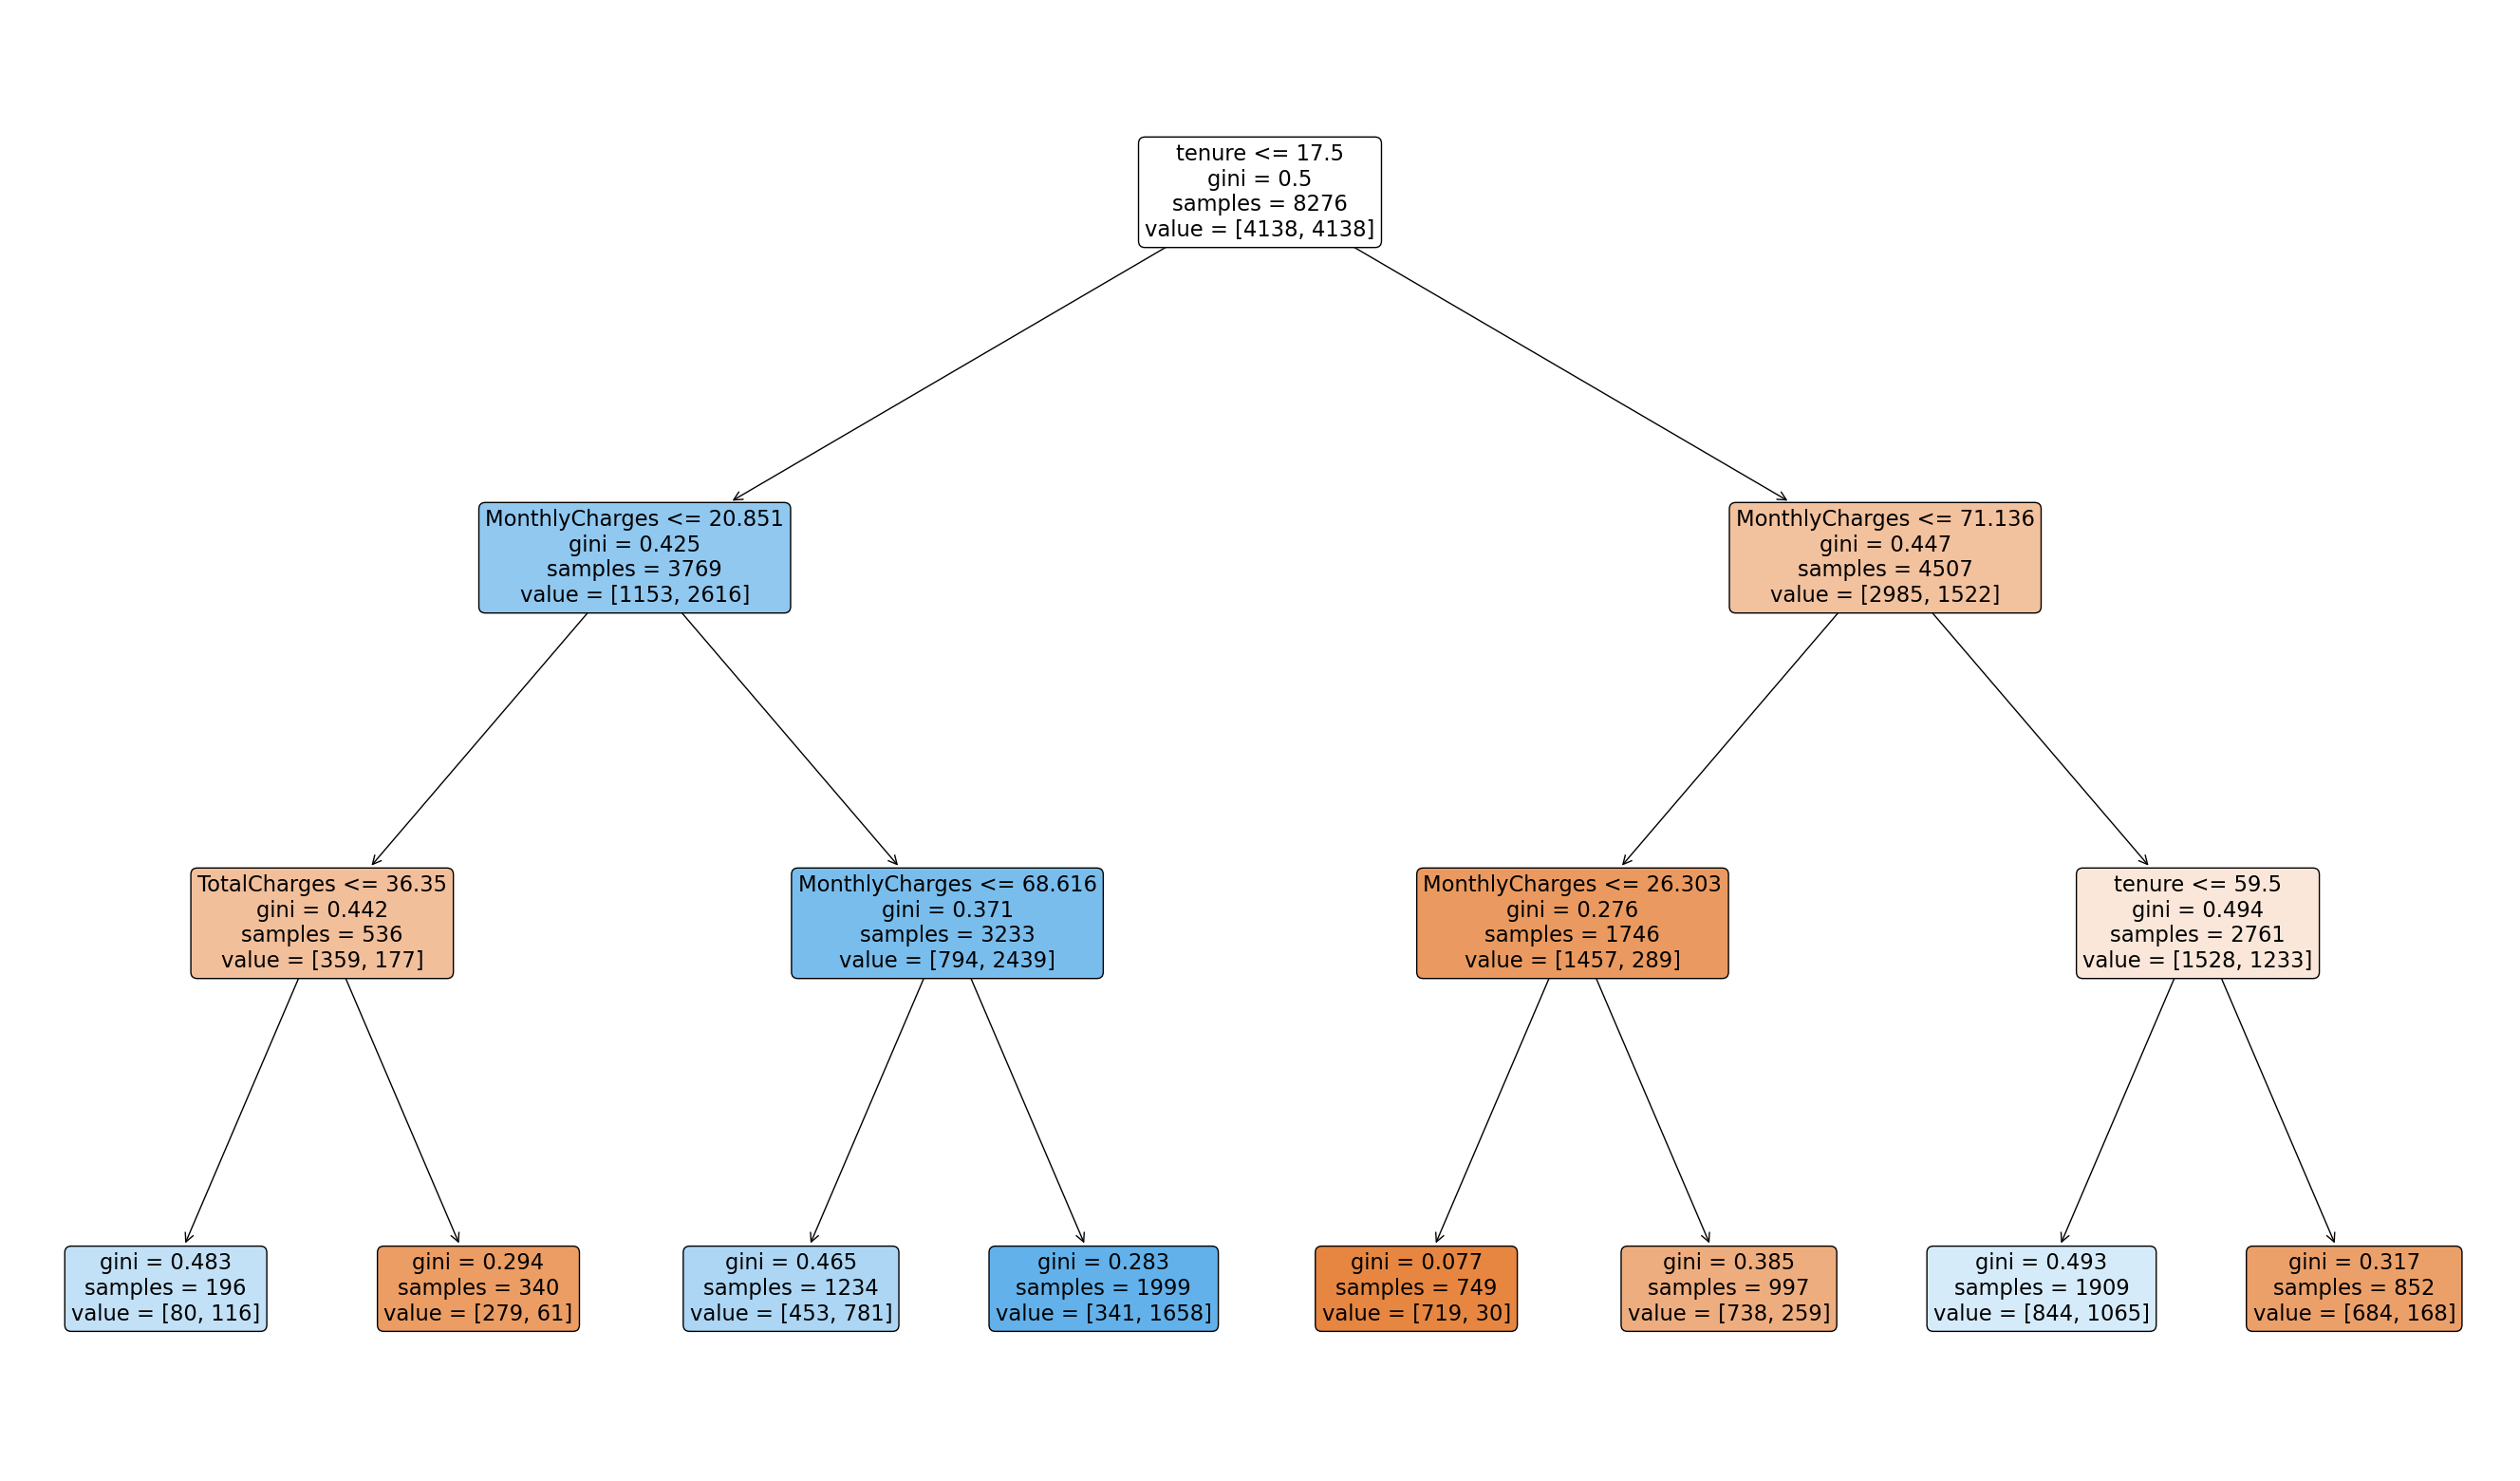

In [15]:
# Decision Tree Classifier

model = DecisionTreeClassifier(max_depth=3)

smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(pd.DataFrame(X_train), y_train)
y_train_sm.value_counts()
model.fit(X_train_sm, y_train_sm)

y_pred_train_dt = model.predict(X_train_sm)
y_pred_test_dt = model.predict(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_sm, y_pred_train_dt),
                                         precision_score(y_train_sm, y_pred_train_dt),
                                         recall_score(y_train_sm, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})
display(performance_df)


scores=cross_val_score(model, X_train_sm, y_train_sm, cv=5)
print("Cross validation scores: ", scores)
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

y_pred_train = cross_val_predict(model, X_train_sm, y_train_sm, cv=5)
performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                       'Train': [accuracy_score(y_train_sm, y_pred_train),
                                                 precision_score(y_train_sm, y_pred_train),
                                                 recall_score(y_train_sm, y_pred_train)]})
display(performance_df)

# Visualize Decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))
plot_tree(model,filled = True, rounded=True,feature_names=list(X.columns))
plt.show()

In [23]:
model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, {'max_depth': range(1,37)}, cv=5, return_train_score=True, n_jobs=-1, scoring='recall')
grid_search.fit(X_train_sm,y_train_sm.values.ravel())
best_params = grid_search.best_params_ #To check the best set of parameters returned
best_params

{'max_depth': 3}

In [19]:
def tree_classifier_range(a, b):
    start = min(a,b)
    results = {}
    for i in range(abs(b-a)):
        
        model = DecisionTreeClassifier(max_depth=start+i)
        model.fit(X_train_sm, y_train_sm)

        y_pred_train_dt = model.predict(X_train_sm)
        y_pred_test_dt = model.predict(X_test)

        performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                       'Train': [accuracy_score(y_train_sm, y_pred_train_dt),
                                                 precision_score(y_train_sm, y_pred_train_dt),
                                                 recall_score(y_train_sm, y_pred_train_dt)],
                                       'Test': [accuracy_score(y_test, y_pred_test_dt),
                                                precision_score(y_test, y_pred_test_dt),
                                                recall_score(y_test, y_pred_test_dt)]})
        
        results[f"{start+i}"] = recall_score(y_test, y_pred_test_dt)
        #print(f"K = {start+i}")
        #display(performance_df)
    
    return pd.DataFrame.from_dict(results, orient='index', columns=['recall'])

df = tree_classifier_range(1,37)
df.sort_values(by='recall', ascending=False).head(15)

,recall
3,0.882038
5,0.806971
7,0.806971
6,0.790885
8,0.777480
9,0.747989
11,0.734584
10,0.723861
12,0.713137
4,0.710456


In [46]:
#
#
#
#
#
#
#

In [50]:
# Random Forest Classifier

rfc_ops = {"max_depth":7,
           "min_samples_leaf":20,
           "n_estimators":100,
           "bootstrap":True,
           "oob_score":True,
           "random_state":42}

clf = RandomForestClassifier(**rfc_ops)
clf.fit(X_train_sm, y_train_sm)
print("train prediction accuracy score: %.2f" %(clf.score(X_train, y_train)))
print("test prediction accuracy score: %.2f"  %(clf.score(X_test, y_test)))
score = recall_score(y_test,clf.predict(X_test))
score

train prediction accuracy score: 0.75
test prediction accuracy score: 0.74


0.7560321715817694

In [51]:
X_train_sm

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,21,0,64.850000,1336.800000
1,54,0,97.200000,5129.450000
2,1,0,23.450000,23.450000
3,4,0,70.200000,237.950000
4,0,0,61.900000,1397.475000
...,...,...,...,...
8271,4,0,88.441178,345.704915
8272,14,1,68.121975,1031.107548
8273,8,0,92.131980,730.077303
8274,58,0,103.555502,6235.093224
